In [161]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [162]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [163]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [164]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

In [165]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

In [166]:
learning_rate = 0.08
num_epochs = 30
batch_size = 100

my_feature = "median_income"
my_label = "median_house_value"

## Validation split

Epoch 1/30
119/119 [==============================] - 0s 2ms/step - loss: 40054.5117 - root_mean_squared_error: 200.1362 - val_loss: 41795.1914 - val_root_mean_squared_error: 204.4387
Epoch 2/30
119/119 [==============================] - 0s 1ms/step - loss: 25004.4902 - root_mean_squared_error: 158.1281 - val_loss: 25668.1680 - val_root_mean_squared_error: 160.2129
Epoch 3/30
119/119 [==============================] - 0s 1ms/step - loss: 14577.9316 - root_mean_squared_error: 120.7391 - val_loss: 14709.5635 - val_root_mean_squared_error: 121.2830
Epoch 4/30
119/119 [==============================] - 0s 1ms/step - loss: 8662.0381 - root_mean_squared_error: 93.0701 - val_loss: 8881.9688 - val_root_mean_squared_error: 94.2442
Epoch 5/30
119/119 [==============================] - 0s 935us/step - loss: 6871.1978 - root_mean_squared_error: 82.8927 - val_loss: 7696.0386 - val_root_mean_squared_error: 87.7271
Epoch 6/30
119/119 [==============================] - 0s 1ms/step - loss: 6781.6792 - 

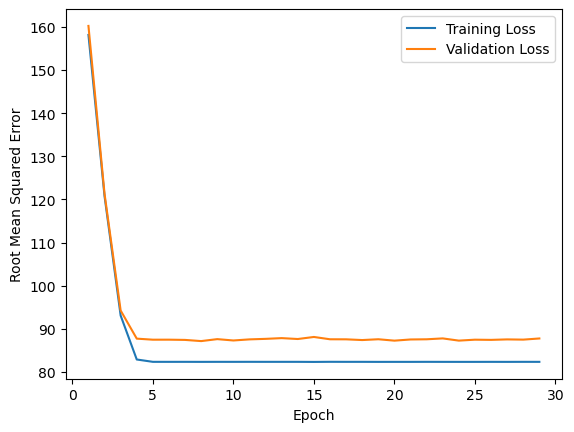

In [167]:
validation_split = 0.3

my_model = build_model(learning_rate)

epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, num_epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

## Investigation of why the loss curves differ

In [168]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


### The original training set is sorted by longitude. Apparently, longitude influences the relationship of median_income to median_house_value.

### To fix the problem, we need to shuffle the examples in the training set before splitting the examples into a training set and validation set

In [169]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 41985.7891 - root_mean_squared_error: 204.9043 - val_loss: 32200.6465 - val_root_mean_squared_error: 179.4454
Epoch 2/70
136/136 [==============================] - 0s 871us/step - loss: 24404.8730 - root_mean_squared_error: 156.2206 - val_loss: 17846.4551 - val_root_mean_squared_error: 133.5906
Epoch 3/70
136/136 [==============================] - 0s 866us/step - loss: 13031.3262 - root_mean_squared_error: 114.1548 - val_loss: 9645.2656 - val_root_mean_squared_error: 98.2103
Epoch 4/70
136/136 [==============================] - 0s 833us/step - loss: 7756.4888 - root_mean_squared_error: 88.0709 - val_loss: 7286.4839 - val_root_mean_squared_error: 85.3609
Epoch 5/70
136/136 [==============================] - 0s 860us/step - loss: 6952.1890 - root_mean_squared_error: 83.3798 - val_loss: 7270.2192 - val_root_mean_squared_error: 85.2656
Epoch 6/70
136/136 [==============================] - 0s 926us/step - loss: 6951.7

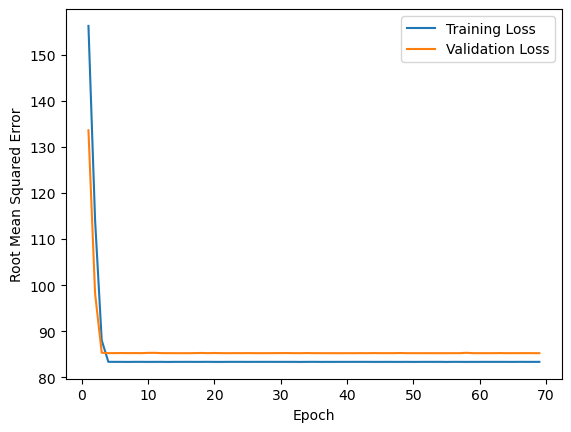

In [170]:
learning_rate = 0.08
num_epochs = 70
batch_size = 100

validation_split = 0.2

my_feature = "median_income"
my_label = "median_house_value"

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, num_epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

### Note that, after shuffling the original training set, the final loss for the training set and the validation set become much closer. If validation_split < 0.15, the final loss values for the training set and validation set diverge meaningfully. Apparently, the validation set no longer contains enough examples.

## Evaluating the model´s performance for generalization using the test-set

The test set usually acts as the ultimate judge of a model's quality. The test set can serve as an impartial judge because its examples haven't been used in training the model.

In [171]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 738us/step - loss: 7018.9795 - root_mean_squared_error: 83.7794


### Comparing the last epoch mean_squared_error of training with the evaluation on the test set we can see that they´re similar, so the training occured well, i.e., the model doesn´t overfit.